In [1]:
import torch

x = [[1, 2], [3, 4], [5, 6], [7, 8]]
y = [[3], [7], [11], [15]]

In [2]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [4]:
import torch.nn as nn

class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2, 8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8, 1)
        
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [5]:
mynet = MyNeuralNet().to(device)

In [6]:
mynet.input_to_hidden_layer.weight

Parameter containing:
tensor([[-0.2274, -0.2619],
        [ 0.4994,  0.5916],
        [-0.1035, -0.0181],
        [-0.3358, -0.1606],
        [ 0.4064,  0.5399],
        [ 0.0580,  0.3106],
        [ 0.3296,  0.3794],
        [ 0.2337,  0.3037]], device='cuda:0', requires_grad=True)

In [7]:
mynet.parameters()

<generator object Module.parameters at 0x7f9c7ce45ee0>

In [8]:
for par in mynet.parameters():
    print(par)

Parameter containing:
tensor([[-0.2274, -0.2619],
        [ 0.4994,  0.5916],
        [-0.1035, -0.0181],
        [-0.3358, -0.1606],
        [ 0.4064,  0.5399],
        [ 0.0580,  0.3106],
        [ 0.3296,  0.3794],
        [ 0.2337,  0.3037]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.1395,  0.6912,  0.3164, -0.6924,  0.4544,  0.6322,  0.3538,  0.1736],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.1624, -0.0113,  0.2236,  0.1546, -0.0977,  0.2800, -0.1905, -0.3033]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.1845], device='cuda:0', requires_grad=True)


An alternative way of defining the model using the `nn.Parameter`
function is as follows:
**for illustration only**
```
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Parameter(torch.rand(2,8))
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Parameter(torch.rand(8,1))
        
    def forward(self, x):
        x = x @ self.input_to_hidden_layer
        x = self.hidden_layer_activation(x)
        x = x @ self.hidden_to_output_layer
        return x
```

In [9]:
loss_func = nn.MSELoss()

In [10]:
_Y = mynet(X)
loss_value = loss_func(_Y, Y)
print(loss_value)

tensor(136.9380, device='cuda:0', grad_fn=<MseLossBackward0>)


In [11]:
from torch.optim import SGD

opt = SGD(mynet.parameters(), lr=0.001)

In [12]:
loss_history = []
for _ in range(50):
    opt.zero_grad() # flush the previous epoch's gradients
    loss_value = loss_func(mynet(X), Y) # compute loss
    loss_value.backward() # perform back-propagation
    opt.step() # update the weights according to the gradients computed
    loss_history.append(loss_value.item())

Text(0, 0.5, 'loss value')

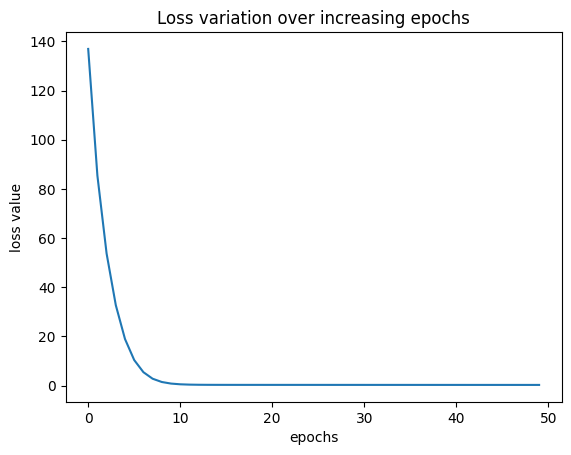

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

---